<a href="https://colab.research.google.com/github/PyBeginner1/CarPricePredict/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
data = pd.read_csv('/content/car data.csv')

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
#checking no of rows & cols
data.shape

(301, 9)

In [9]:
#checking if there are any null values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#checking info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
#statistical vals
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
#calculate the values of each distribution
print(data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [15]:
print(data.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [16]:
print(data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
print(data.Car_Name.value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Bajaj Avenger 150 street     1
UM Renegade Mojave           1
alto 800                     1
Bajaj Pulsar RS200           1
vitara brezza                1
Name: Car_Name, Length: 98, dtype: int64


Encoding the Categorical Data

In [18]:
#encoding the fuel_type -->Petrol =0, diesel = 1, cng =2
data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG':2 }}, inplace = True)

In [19]:
#encoding the Seller_Type
data.replace({'Seller_Type': {'Dealer' : 0, 'Individual': 1 }}, inplace = True)

In [23]:
#encoding Transmission
data.replace({'Transmission': {'Manual' : 0, 'Automatic': 1 }}, inplace = True)


In [25]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data & target(selling price)

In [35]:
X = data.drop(['Car_Name', 'Selling_Price'],axis = 1)
Y = data["Selling_Price"]

In [51]:
print(X)


     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [52]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting train & test data

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [55]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


Model training

1) Linear Regression

In [56]:
#loading the linear regression model
model = LinearRegression()


In [59]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#prediction on training data
training_data_prediction = model.predict(X_train)

In [64]:
#r2 error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error :", score_1)

R squared error : 0.8799451660493711


In [66]:
#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean absolute Error:", score_2)

Mean absolute Error: 1.2166174093911273


Visualize the Actual values with predicted values

Text(0.5, 1.0, 'Actual vs Prediction')

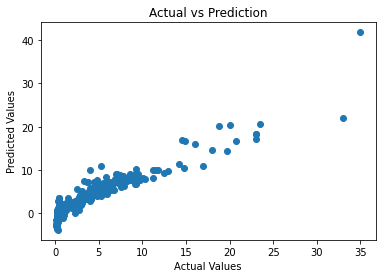

In [70]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Prediction")


In [67]:
#prediction on testing data
testing_data_predict =model.predict(X_test)

In [68]:
#r sqrd error
score_3 = metrics.r2_score(Y_test,testing_data_predict )

#mean abs error
score_4 = metrics.mean_absolute_error(Y_test, testing_data_predict)

In [69]:
print("R squared error:" , score_3)
print("Mean Absolue Error: ", score_4)

R squared error: 0.8365766715027051
Mean Absolue Error:  1.1516382156613783


Text(0.5, 1.0, 'Actual vs Prediction')

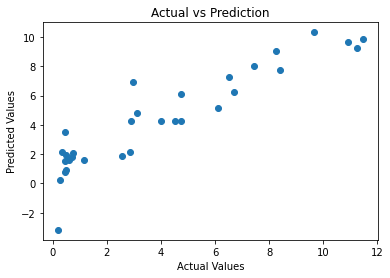

In [74]:
plt.scatter(Y_test,testing_data_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Prediction")

2) Lasso Regression

In [75]:
#loading the linear regression model
l_model = Lasso()


In [76]:
l_model.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
#prediction on training data
training_data_prediction = l_model.predict(X_train)

In [78]:
#r2 error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error :", score_1)

R squared error : 0.8427856123435794


In [79]:
#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean absolute Error:", score_2)

Mean absolute Error: 1.2863097696916528


Visualize the Actual values with predicted values

Text(0.5, 1.0, 'Actual vs Prediction')

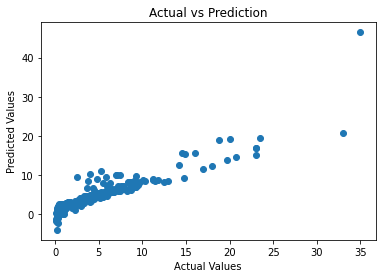

In [80]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Prediction")


In [81]:
#prediction on testing data
testing_data_predict =l_model.predict(X_test)

In [82]:
#r sqrd error
score_3 = metrics.r2_score(Y_test,testing_data_predict )

#mean abs error
score_4 = metrics.mean_absolute_error(Y_test, testing_data_predict)

In [83]:
print("R squared error:" , score_3)
print("Mean Absolue Error: ", score_4)

R squared error: 0.8709167941173195
Mean Absolue Error:  1.0507413774170433


Text(0.5, 1.0, 'Actual vs Prediction')

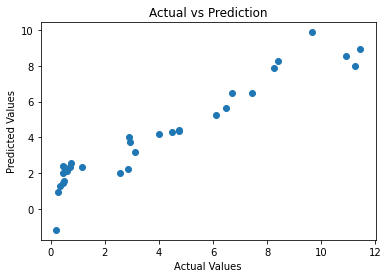

In [84]:
plt.scatter(Y_test,testing_data_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Prediction")